Посмотрим на наши данные

In [93]:
import pandas as pd

In [94]:
df = pd.read_csv('cian.csv')
df.head()

,Аварийность,Адрес,Безопасность,Газоснабжение,Год постройки,Жилая,Инфраструктура,Кухня,Лифты,Метро 0,...,Построен,Срок сдачи,Строительная серия,Тип дома,Тип перекрытий,Транспорт,Цена,Цена за квадрат,Экология,Этаж
0,Нет,"Московская область, Мытищи, мкр. Ярославский, ...",NaN,NaN,2012.0,24 м²,NaN,10 м²,"2 пассажирских, 1 грузовой",⋅ 15 мин. на транспорте,...,2012.0,NaN,КОПЭ Парус,Панельный,Железобетонные,NaN,6550000.0,136 458,NaN,12 из 25
1,Нет,"Москва, ЗАО, р-н Дорогомилово, Кутузовский про...",NaN,Центральное,1957.0,45 м²,NaN,NaN,Нет,⋅ 13 мин. пешком,...,1934.0,NaN,NaN,Кирпичный,Железобетонные,NaN,26000000.0,406 250,NaN,4 из 7
2,Нет,"Москва, ЦАО, р-н Тверской, 1-й Колобовский пер...",NaN,NaN,1917.0,"23,4 м²",NaN,"8,9 м²",Нет,⋅ 5 мин. пешком,...,1917.0,NaN,NaN,Кирпичный,Деревянные,NaN,18000000.0,450 000,NaN,2 из 3
3,Нет,"Москва, ЗАО, р-н Раменки, Мосфильмовская ул., 8",NaN,NaN,2011.0,63 м²,NaN,20 м²,Нет,⋅ 11 мин. на транспорте,...,NaN,NaN,NaN,Монолитный,Железобетонные,NaN,59900000.0,611 224,NaN,33 из 54
4,Нет,"Москва, ЦАО, р-н Хамовники, Комсомольский прос...",NaN,NaN,2014.0,48 м²,NaN,NaN,1 пассажирский,⋅ 10 мин. пешком,...,NaN,NaN,NaN,Монолитный,NaN,NaN,37900000.0,563 150,NaN,4 из 5


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5995 entries, 0 to 5994
Data columns (total 30 columns):
Аварийность                2767 non-null object
Адрес                      5992 non-null object
Безопасность               0 non-null float64
Газоснабжение              665 non-null object
Год постройки              2720 non-null float64
Жилая                      4743 non-null object
Инфраструктура             0 non-null float64
Кухня                      4703 non-null object
Лифты                      4968 non-null object
Метро 0                    5802 non-null object
Метро 1                    4197 non-null object
Метро 2                    3295 non-null object
Мусоропровод               1375 non-null object
Название                   5992 non-null object
Общая                      5992 non-null object
Отопление                  2351 non-null object
Отрицательное соседство    0 non-null float64
Парковка                   2722 non-null object
Подъезды                   2436 non

In [96]:
df.describe()

,Безопасность,Год постройки,Инфраструктура,Отрицательное соседство,Подъезды,Положительное соседство,Построен,Транспорт,Цена,Экология
count,0.0,2720.000000,0.0,0.0,2436.000000,0.0,2230.000000,0.0,5.992000e+03,0.0
mean,NaN,1997.523529,NaN,NaN,4.822660,NaN,1998.917937,NaN,1.851656e+07,NaN
std,NaN,25.971570,NaN,NaN,3.879043,NaN,24.183870,NaN,4.131836e+07,NaN
min,NaN,1847.000000,NaN,NaN,1.000000,NaN,1847.000000,NaN,1.200000e+06,NaN
25%,NaN,1979.000000,NaN,NaN,2.000000,NaN,1980.250000,NaN,6.900000e+06,NaN
50%,NaN,2010.000000,NaN,NaN,4.000000,NaN,2011.000000,NaN,1.094500e+07,NaN
75%,NaN,2016.000000,NaN,NaN,6.000000,NaN,2017.000000,NaN,1.976374e+07,NaN
max,NaN,2019.000000,NaN,NaN,24.000000,NaN,2020.000000,NaN,2.600000e+09,NaN


### Удалим все столбцы, в которых отсутсвует более 45% данных

In [97]:
sum(df.isna().sum() / df.shape[0] > 0.45)

19

In [98]:
empty_data = df.isna().sum().sort_values()[-19:]

In [99]:
df.drop(empty_data.index, axis=1, inplace=True)

#### Удалим столбец с названием объявления, так как для обучения модели он не даст полезной информации

In [100]:
df.drop('Название', axis=1, inplace=True)

### Разделим столбец Этаж на два: фактический этаж квартиры и высота всего здания

In [101]:
split_columns = df['Этаж'].str.split(' ', expand=True)

In [102]:
df['Этаж'] = split_columns[0]
df['Этажность здания'] = split_columns[2]

### Очистим столбцы от ненужных символов

In [103]:
df['Жилая'] = df['Жилая'].str.split('\xa0',  expand=True)
df['Кухня'] = df['Кухня'].str.split('\xa0',  expand=True)
df['Общая'] = df['Общая'].str.split('\xa0',  expand=True)

In [104]:
df['Жилая'] = df['Жилая'].str.replace(',', '.').astype(float)
df['Кухня'] = df['Кухня'].str.replace(',', '.').astype(float)
df['Общая'] = df['Общая'].str.replace(' ', '')
df['Общая'] = df['Общая'].str.replace(',', '.').astype(float)

In [105]:
df['Цена за квадрат'] = df['Цена за квадрат'].str.replace(' ', '').astype(float)

In [106]:
df.head()

,Адрес,Жилая,Кухня,Лифты,Метро 0,Метро 1,Общая,Цена,Цена за квадрат,Этаж,Этажность здания
0,"Московская область, Мытищи, мкр. Ярославский, ...",24.0,10.0,"2 пассажирских, 1 грузовой",⋅ 15 мин. на транспорте,NaN,48.0,6550000.0,136458.0,12,25
1,"Москва, ЗАО, р-н Дорогомилово, Кутузовский про...",45.0,NaN,Нет,⋅ 13 мин. пешком,NaN,64.0,26000000.0,406250.0,4,7
2,"Москва, ЦАО, р-н Тверской, 1-й Колобовский пер...",23.4,8.9,Нет,⋅ 5 мин. пешком,NaN,40.0,18000000.0,450000.0,2,3
3,"Москва, ЗАО, р-н Раменки, Мосфильмовская ул., 8",63.0,20.0,Нет,⋅ 11 мин. на транспорте,⋅ 5 мин. на транспорте,98.0,59900000.0,611224.0,33,54
4,"Москва, ЦАО, р-н Хамовники, Комсомольский прос...",48.0,NaN,1 пассажирский,⋅ 10 мин. пешком,NaN,67.3,37900000.0,563150.0,4,5


In [107]:
split_subway = df['Метро 0'].str.split(' ', n=5, expand=True)

In [108]:
df['Время'] = split_subway[3]
df['Способ передвижения'] = split_subway[5]

In [109]:
df.head()

,Адрес,Жилая,Кухня,Лифты,Метро 0,Метро 1,Общая,Цена,Цена за квадрат,Этаж,Этажность здания,Время,Способ передвижения
0,"Московская область, Мытищи, мкр. Ярославский, ...",24.0,10.0,"2 пассажирских, 1 грузовой",⋅ 15 мин. на транспорте,NaN,48.0,6550000.0,136458.0,12,25,15,на транспорте
1,"Москва, ЗАО, р-н Дорогомилово, Кутузовский про...",45.0,NaN,Нет,⋅ 13 мин. пешком,NaN,64.0,26000000.0,406250.0,4,7,13,пешком
2,"Москва, ЦАО, р-н Тверской, 1-й Колобовский пер...",23.4,8.9,Нет,⋅ 5 мин. пешком,NaN,40.0,18000000.0,450000.0,2,3,5,пешком
3,"Москва, ЗАО, р-н Раменки, Мосфильмовская ул., 8",63.0,20.0,Нет,⋅ 11 мин. на транспорте,⋅ 5 мин. на транспорте,98.0,59900000.0,611224.0,33,54,11,на транспорте
4,"Москва, ЦАО, р-н Хамовники, Комсомольский прос...",48.0,NaN,1 пассажирский,⋅ 10 мин. пешком,NaN,67.3,37900000.0,563150.0,4,5,10,пешком


In [110]:
df = df.drop(['Метро 0', 'Метро 1'], axis=1)

In [111]:
df = df.drop(['Лифты'], axis=1)

In [112]:
df.head()

,Адрес,Жилая,Кухня,Общая,Цена,Цена за квадрат,Этаж,Этажность здания,Время,Способ передвижения
0,"Московская область, Мытищи, мкр. Ярославский, ...",24.0,10.0,48.0,6550000.0,136458.0,12,25,15,на транспорте
1,"Москва, ЗАО, р-н Дорогомилово, Кутузовский про...",45.0,NaN,64.0,26000000.0,406250.0,4,7,13,пешком
2,"Москва, ЦАО, р-н Тверской, 1-й Колобовский пер...",23.4,8.9,40.0,18000000.0,450000.0,2,3,5,пешком
3,"Москва, ЗАО, р-н Раменки, Мосфильмовская ул., 8",63.0,20.0,98.0,59900000.0,611224.0,33,54,11,на транспорте
4,"Москва, ЦАО, р-н Хамовники, Комсомольский прос...",48.0,NaN,67.3,37900000.0,563150.0,4,5,10,пешком


In [113]:
df.isna().sum().sort_values()

Адрес                     3
Общая                     3
Цена                      3
Цена за квадрат           3
Этаж                      3
Этажность здания          3
Время                   193
Способ передвижения     238
Жилая                  1252
Кухня                  1292
dtype: int64

Удалим строки, в которых значения таргета неизвестно

In [114]:
df = df[df['Цена'].notna()]

In [115]:
df[df['Время'] == '<1'].shape

(232, 10)

In [116]:
df['Время'] = df['Время'].str.replace('<1', '0').astype(float)

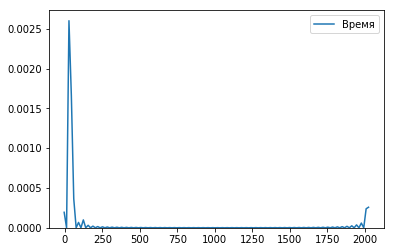

In [118]:
import seaborn as sns

sns.kdeplot(df['Время'])

In [119]:
df = df[df['Время'] < 100]

In [120]:
df['Этаж'] = df['Этаж'].astype(int)
df['Этажность здания'] = df['Этажность здания'].astype(int)

Удалим строки, тип дома которых встречается редко

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5750 entries, 0 to 5994
Data columns (total 10 columns):
Адрес                  5750 non-null object
Жилая                  4590 non-null float64
Кухня                  4574 non-null float64
Общая                  5750 non-null float64
Цена                   5750 non-null float64
Цена за квадрат        5750 non-null float64
Этаж                   5750 non-null int32
Этажность здания       5750 non-null int32
Время                  5750 non-null float64
Способ передвижения    5750 non-null object
dtypes: float64(6), int32(2), object(2)
memory usage: 449.2+ KB


In [123]:
df.to_csv('clean_data.csv', index=False)